In this submission I will try to test various estimators and approaches in order to predict the Titanic disaster results. The competition is great for testing these various approaches and get an instant answer (by submitting the results). In a real world prediction problem the feedback, which acts as the most important factor for improvment of the model, wouldn't have been so direct. In this way you can see how different models perform in real world aside from "myths" or personal preferances.  

In [1]:
#The first step is to insert all the necessary libraries in a code cell

#For numeric computations
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For spliting the set into training and validation data
from sklearn.model_selection import train_test_split

#Individual estimators for training the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensemble estimators for training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#XGBoost ensemble estimator (variation of GradientBoostingClassifier)
from xgboost import XGBClassifier

#Methods for estimating the accuracy of the model
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Import re library for manipulation of strings
import re

#Ignore jupiter notebooks warnings
import warnings
warnings.filterwarnings('ignore')

# import VotingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
#Import and inspect the data
#Here i am inserting them from my hard drive
TrainFilePath=r'C:\Users\kostas\Desktop\Kostas_documents\My programs\Kaggle Titanic Competition\train.csv'
TestFilePath=r'C:\Users\kostas\Desktop\Kostas_documents\My programs\Kaggle Titanic Competition\test.csv'

TrainData=pd.read_csv(TrainFilePath)
TestData=pd.read_csv(TestFilePath)

#Printing the first 10 rows of the training data
TrainData.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
TestData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


The only difference between training and test data is the missing "Survived" column from the test data.
This was expected because we have to predict it.

In [4]:
#Inspect the structure of the training data
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Missing values
TrainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#We can see that the cabin column is missing most of its values. The percentage of missing values is
percent=(687/891)*100
print("The percentage of missing values in 'Cabin' column is", round(percent, 2), '%')

The percentage of missing values in 'Cabin' column is 77.1 %


In [7]:
#Missing values in TestData
TestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The missing values are so many that someone might consider dropping the column. We will not do that because a column with many
missing values does not mean that it can't provide the model with very useful information. Specifically if the letter denotes the ship floor then it is very crucial for survival in a ship where low floor could get flooded easily relative to higher floors. 

Common sense is our first guide as to which columns are more significant. At first glance the most significant columns are
Pclass, Sex, Age, SibSp, Parch, Fare and maybe Embarked. PassengerId is irrelevant and the column Ticket doesn't seem to play a significant role because 5-7 digits numbers on tickets and letters seem to be random and not relevant to a specific class or some other column.

Another thought is that moral code dictates that the physically weaker passengers should have been protected by the young male adults so we expect to see a higher survival rate to women, children and older people and a lower survival rate to young male adults.

Text(0, 0.5, 'Survival rate')

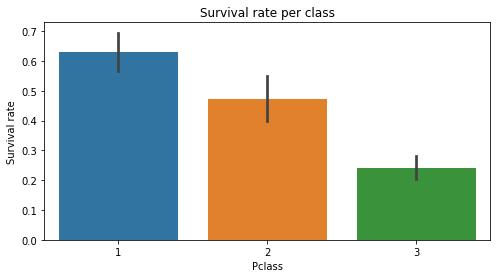

In [8]:
#We will try to find correlation using visualizations
#Let's test the 'Pclass' column relative to 'Survival'

# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title('Survival rate per class')

# Bar chart showing deaths relative to class
sns.barplot(x=TrainData['Pclass'], y=TrainData['Survived'])

# Add label for vertical axis
plt.ylabel('Survival rate')

Above we can see the average survival for each class. The plot clearly shows that more than 60% of the 1st class survived with uncertainty range between 57% and 68%. For the 2nd class average survival rate is almost 50% with uncertainty range between 41% and 55%. For the third class we see an incredible low rate of survival, about 23% with uncertainty range between 20% and 26%. So 'Pclass' has a very high correlation to 'Survival' column and we will use it to train the model. 

Text(0, 0.5, 'Survival rate')

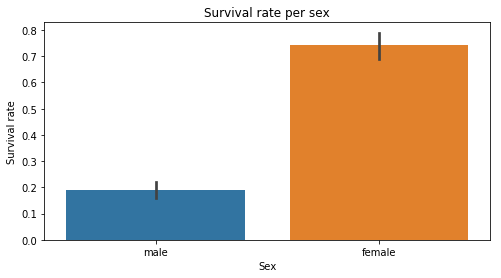

In [9]:
#Let's test the 'Sex' column relative to 'Survival'

# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title('Survival rate per sex')

# Bar chart showing deaths relative to class
sns.barplot(x=TrainData['Sex'], y=TrainData['Survived'])

# Add label for vertical axis
plt.ylabel('Survival rate')

Above we can see the average survival for each sex. The plot explicitly shows that more than 70% of the women survived 
with uncertainty range between 69% and 78%. On the contrary most men did not survive. Their average survival rate 
is almost 19% with uncertainty range between 17% and 22%. So 'Sex' is the next column we will use to train the model.

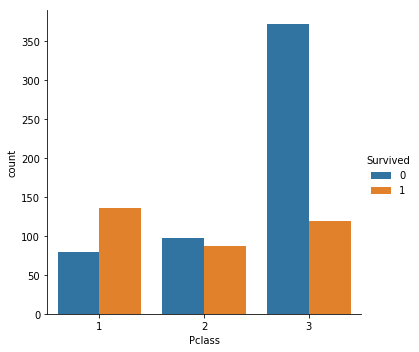

In [10]:
#A different plot to show the correlation of 'Pclass' and 'Survival'. Below we count the number of survived or not survived 
#per class. Especially for the 1st class more people survived than died.
sns.catplot(x='Pclass', hue='Survived', kind='count', data=TrainData)

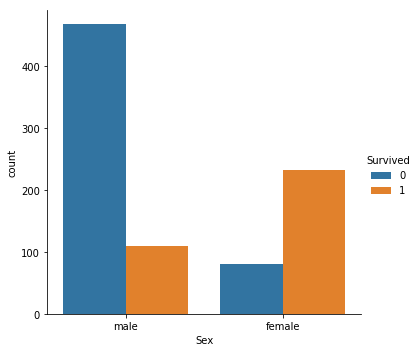

In [11]:
#The same for the correlation of 'Sex' and 'Survival'. Below we count the number of people survived per sex.
#Less than 100 women died. On the contrary only about 100 men survived and more than 450 did not survive.
sns.catplot(x='Sex', hue='Survived', kind='count', data=TrainData)

Text(0, 0.5, 'Survival rate')

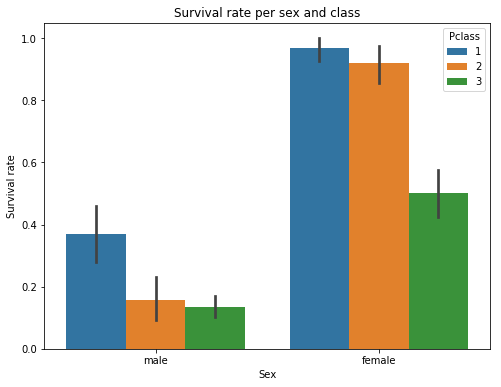

In [12]:
#Just for curiocity let's find out women and men survival rate per class

plt.figure(figsize=(8,6))
plt.title('Survival rate per sex and class')
sns.barplot(x='Sex', y='Survived', hue = 'Pclass', data=TrainData)
plt.ylabel('Survival rate')

Women and men of 1st class have a higher survival rate

Text(0, 0.5, 'Survival rate')

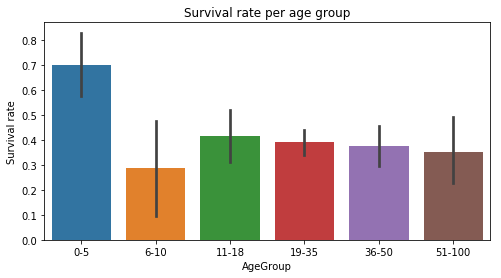

In [13]:
#Now we will find out the correlation of column 'Age' relative to 'Survival'. We must make age groups otherwise the plot
#will be unreadable due to the high range of different ages.

#I will make a new column called 'AgeGroup'. The smallest children must had higher survival rate due to moral code
TrainData['AgeGroup']=pd.cut(TrainData['Age'], bins=[0.1, 6, 11, 19, 36, 51, 101], labels= ['0-5', '6-10', '11-18', 
                                                                                 '19-35', '36-50', '51-100'])

#I' ll do the same for TestData for compatibility
TestData['AgeGroup']=pd.cut(TestData['Age'], bins=[0.1, 6, 11, 19, 36, 51, 101], labels= ['0-5','6-10', '11-18', 
                                                                                 '19-35', '36-50', '51-100'])

# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title('Survival rate per age group')

# Bar chart showing deaths relative to class
sns.barplot(x=TrainData['AgeGroup'], y=TrainData['Survived'])

# Add label for vertical axis
plt.ylabel('Survival rate')

In [14]:
#Also check the transformation of TestData
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,19-35
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,36-50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,51-100
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,19-35
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,19-35


We can see that age relative to survival plays a significant role mostly in age group from 0-5. This can be attributed 
as I said before to the moral code which dictates the protection and survival of the physically weaker and the children. So column 'Age' has significant information and we will use it to train the predictive model.

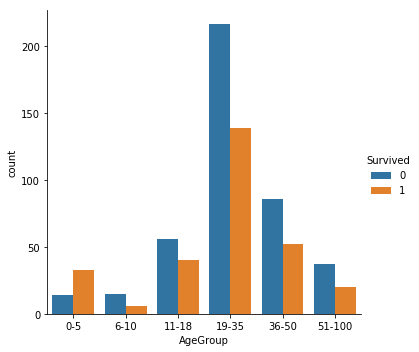

In [15]:
#The same as above. We can clearly see that most of the children between 0 and 10 survived.
sns.catplot(x='AgeGroup', hue='Survived', kind='count', data=TrainData)

In [16]:
#We will explore SibSp column. First of all we see how many unique values there are
TrainData['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

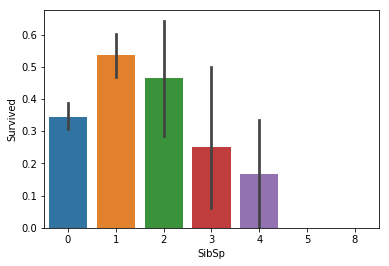

In [17]:
#There are 7 unique values. Passengers with 0 value had no siblings on the ship and passemgers with 8 had 8 siblings on the ship
#We will see if the number of siblings has any meaningful correlation to survival rate
sns.barplot(x=TrainData['SibSp'], y=TrainData['Survived'])

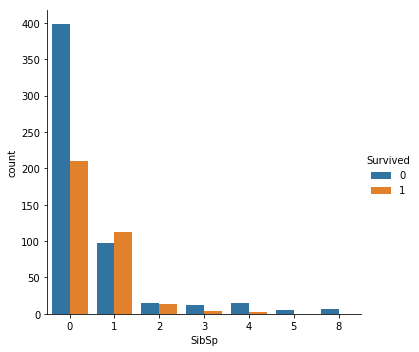

In [18]:
#Knowing their "siblings status" how many survived 
sns.catplot(x='SibSp', hue='Survived', kind='count', data=TrainData)

Most people didn't have any siblings on the ship.Both plots show that people with 1 sibling had a higher survival rate. Column 'SibSp' doesn't seem to have a strong correlation but it might add some accuracy to the model.

In [19]:
#Exploration of Parch column
#Unique values
TrainData['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Text(0, 0.5, 'Survival rate')

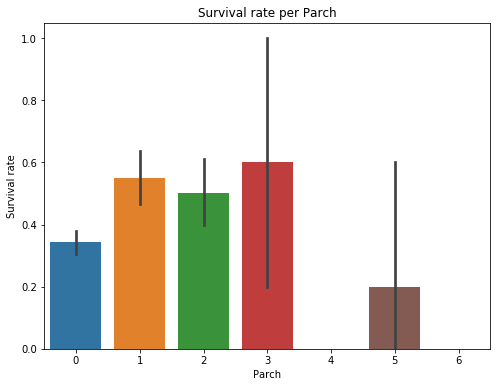

In [20]:

plt.figure(figsize=(8,6))
plt.title("Survival rate per Parch")
sns.barplot(x=TrainData['Parch'], y=TrainData['Survived'])
plt.ylabel("Survival rate")

Survival rate for those who had their parents on board seem to be a little higher than 50%. This is a slightly significant column.

In [21]:
#Explore Fare column
#First we find the value structure
TrainData.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

Too many values. If the correlation between 'Fare' and 'Pclass' is very high the two columns overlap relative to the useful 
information we can take. We will test this assumption with the plot below.

Text(0, 0.5, 'Fare')

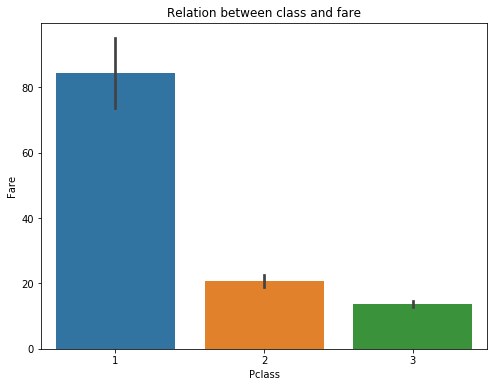

In [22]:
plt.figure(figsize=(8,6))
plt.title('Relation between class and fare')
sns.barplot(x=TrainData['Pclass'], y=TrainData['Fare'])
plt.ylabel('Fare')

The price of the fare is highly linked to the class. So column 'Fare' won't give any more significant information than the one
we can take from the 'Pclass'. We will not incorporate it in the model.

The useful part from 'Cabin' column is the letter which denotes the deck. As I said the deck in a ship wreck might be a very significant factor to the survival rate. Low decks might get flooded in a very rapid pace.

In [23]:
#My goal is to extract the letter from the string and make a new column from it. 'Deck' will be the new column.
TrainData['Deck']=TrainData['Cabin'].astype(str).str[0]
#Print the first 5 rows 
TrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-35,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36-50,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19-35,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,19-35,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,19-35,n


In [24]:
#Unique values of column 'Deck'
TrainData['Deck'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Text(0, 0.5, 'Survival rate')

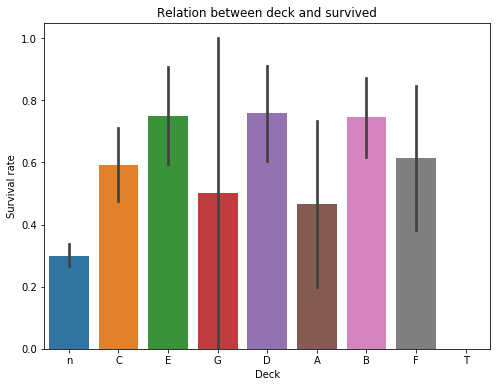

In [25]:
#And now I can analyze the column 'Deck'. I will not replace letter n, which denotes nan, with some other value because most
#probably it denotes people that didn't have a cabin.
plt.figure(figsize=(8,6))
plt.title('Relation between deck and survived')
sns.barplot(x=TrainData['Deck'], y=TrainData['Survived'])
plt.ylabel('Survival rate')

We can see that E, D, B and C decks have a higher rate of survival. 

In [26]:
#Transforming of TestData for compatibility reasons
TestData['Deck']=TestData['Cabin'].astype(str).str[0]
#Print the first 5 rows 
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,19-35,n
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,36-50,n
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,51-100,n
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,19-35,n
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,19-35,n


In [27]:
#The last column is 'Embarked'. The unique values in this column are
TrainData['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Text(0, 0.5, 'Survival rate')

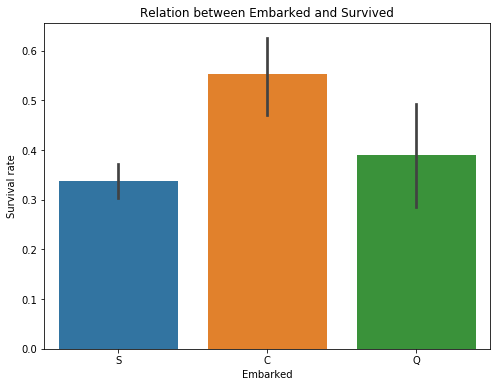

In [28]:
plt.figure(figsize=(8,6))
plt.title('Relation between Embarked and Survived')
sns.barplot(x=TrainData['Embarked'], y=TrainData['Survived'])
plt.ylabel('Survival rate')

Those who embarked in C have a slight above 50% rate of survival with an error range between 48% and 64%. Column 'Embarked' doesn't seem to play a significant role.

Finally we will extract the title from the name of each passenger to see if those with a novelty title had a higher chance of 
survival. Python library 'Regex' and the function 'map' will do the job here.

In [29]:
#Extract an upper-case letter followed by lower-case letters before a dot. Name the array 'title' and group its contents
TrainData['Title'] = TrainData['Name'].map(lambda title:re.compile('[A-Za-z]+\.').search(title).group())
print(TrainData['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


In [30]:
#The same for TestData
TestData['Title'] = TestData['Name'].map(lambda title: re.compile('[A-Za-z]+\.').search(title).group())
print(TestData['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Ms.' 'Col.' 'Rev.' 'Dr.' 'Dona.']


In [31]:
#Make dictionary by assign 1 to nobels and 0 to others for TrainData
dict_title={'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.' : 1,'Don.': 1, 'Rev.' : 1,'Dr.' : 1,'Mme.': 0, 'Ms.': 0, 'Major.': 1,
 'Lady.': 1, 'Sir.': 1, 'Mlle.': 1, 'Col.': 1, 'Capt.': 1, 'the Countess.': 1, 'Jonkheer.': 1,'Dona.': 1}
TrainData['Title'] = TrainData['Title'].map(dict_title)
#Filling missing values with 0 for TrainData
TrainData['Title'] = TrainData['Title'].fillna(0)

In [32]:
#Make dictionary by assign 1 to nobels and 0 to others for TestData
dict_title={'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.' : 1, 'Ms.': 0, 'Col.': 1, 'Rev.': 1, 'Dr': 1, 'Dona.': 1}  
TestData['Title'] = TestData['Title'].map(dict_title)
#Filling missing values with 0 for TestData
TestData['Title'] = TestData['Title'].fillna(0)

From now on I will construct the models. For educational and comparison reasons, first I will make the model by using the Mean Absolute Error metric to test the accuracy, but without cross validation. Then I will make the model by using cross validation in order to compare the two outputs. In both cases I will make various submissions in order to check the accuracy in the real world (TestData).

In [33]:
#Choose variables and split data to test and validation sets. The variables will change in order to make various submissions.
y=TrainData.Survived
TitanicFeatures=['Pclass', 'Sex', 'AgeGroup', 'Embarked', 'Parch', 'SibSp', 'Title']
X=pd.get_dummies(TrainData[TitanicFeatures])
X_test=pd.get_dummies(TestData[TitanicFeatures])

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [34]:
#A function to test various models
def ModelTesting(model):
    Model=model.fit(train_X, train_y)
    preds=Model.predict(val_X)
    mae=mean_absolute_error(val_y, preds)
    return mae*100

In this machine learning competition we deal with a binary classification problem as we have to predict 2 values, 1 for those who lived and 0 for those who didn't. So we have to use the sklearn estimators that are relevant to classification. My expectation here is that the ensemble estimators RandomForestClassifier, GradientBoostingClassifier and Extreme GradientBoostingClassifier will perform better than other individual estimators. At the end we will be able to compare the difference in performance. 

In [35]:
XGBC=ModelTesting(XGBClassifier())

In [36]:
RFC=ModelTesting(RandomForestClassifier(n_estimators=290, max_depth=5, random_state=1))

In [37]:
LR=ModelTesting(LogisticRegression())

In [38]:
LSVC=ModelTesting(LinearSVC())

In [39]:
KNei=ModelTesting(KNeighborsClassifier())

In [40]:
Gau=ModelTesting(GaussianNB())

In [41]:
SGDC=ModelTesting(SGDClassifier())

In [42]:
DTC=ModelTesting(DecisionTreeClassifier())

In [43]:
GBC=ModelTesting(GradientBoostingClassifier(n_estimators=150, random_state=1))

In [44]:
#Create table with scores per testing model starting from the best to the worst
table=pd.DataFrame({'Model': ['GradientBoostingClassifier', 'RandomForestClassifier', 'LogisticRegression', 'LinearSVC',
                   'KNeighborsClassifier', 'GaussianNB', 'SGDClassifier', 'DecisionTreeClassifier', 'XGBoostClassifier'],
                   'MAE': [GBC, RFC, LR, LSVC, KNei, Gau, SGDC, DTC, XGBC]})
table.sort_values(by='MAE', ascending=True)

,Model,MAE
0,GradientBoostingClassifier,17.488789
1,RandomForestClassifier,17.488789
8,XGBoostClassifier,17.488789
7,DecisionTreeClassifier,19.730942
2,LogisticRegression,20.179372
6,SGDClassifier,20.179372
3,LinearSVC,21.076233
4,KNeighborsClassifier,21.076233
5,GaussianNB,21.524664


As expected the three ensemble models performed better. Although the best model seems to be Gradient Boosting Classifier with n_estimators=150 according to the mean absolute error metric. 

In [45]:
#We will test the models for accuracy by also using cross validation
#The method of cross validation we will use is StratifiedKFold which performs best in unbalanced data sets
#For this purpose we will define a function
def ModelTestingCv(model, x=X, y=y):
    model=model
    SKF=StratifiedKFold(n_splits=6)
    AccScore=cross_val_score(model, X, y, cv=SKF)
    return AccScore.mean()*100 #prints the mean of the 5 different cross validation estimations * 100 for better representation

In [46]:
#XGBClassifier with some parameter tuning. 
XGBC_Cv=ModelTestingCv(XGBClassifier(max_depth=3, gamma=0.5))

In [47]:
RFC_Cv=ModelTestingCv(RandomForestClassifier(n_estimators=290, max_depth=5, random_state=1))

In [48]:
LR_Cv=ModelTestingCv(LogisticRegression())

In [49]:
LSVC_Cv=ModelTestingCv(LinearSVC())

In [50]:
KNei_Cv=ModelTestingCv(KNeighborsClassifier())

In [51]:
Gau_Cv=ModelTestingCv(GaussianNB())

In [52]:
SGDC_Cv=ModelTestingCv(SGDClassifier())

In [53]:
DTC_Cv=ModelTestingCv(DecisionTreeClassifier())

In [54]:
#GradientBoostingClassifier with tuned n_estimators parameter.
GBC_Cv=ModelTestingCv(GradientBoostingClassifier(n_estimators=150, random_state=1))

In [55]:
#Create table with cross validation scores per testing model starting from the worst to the best
table=pd.DataFrame({'Model': ['GradientBoostingClassifier', 'RandomForestClassifier', 'LogisticRegression', 'LinearSVC',
                   'KNeighborsClassifier', 'GaussianNB', 'SGDClassifier', 'DecisionTreeClassifier', 'XGBoostClassifier'],
                   'Score': [GBC_Cv, RFC_Cv, LR_Cv, LSVC_Cv, KNei_Cv, Gau_Cv, SGDC_Cv, DTC_Cv, XGBC_Cv]})
table.sort_values(by='Score', ascending=False)

,Model,Score
1,RandomForestClassifier,83.386994
8,XGBoostClassifier,82.266915
4,KNeighborsClassifier,81.145323
0,GradientBoostingClassifier,81.031199
2,LogisticRegression,80.695629
3,LinearSVC,80.472671
5,GaussianNB,79.351835
7,DecisionTreeClassifier,79.123587
6,SGDClassifier,77.219753


The first conclusion is the superiority of cross validation as a method to find the model with the best predictive power.

With cross validation the best predictive model is RandomForestClassifier and the best score I achieved on Kaggle competition was by using only 4 columns, 'Pclass', 'Sex', 'AgeGroup', 'Embarked' (4th submission) with 290 nodes and the depth parameter set to 5, which ranked me on 6 March 2022 on position 1819 of 14158 competitors (first 13% with 0.78468 score) . The use of additional columns like 'Title', 'Parch', 'SibSp' etc did not give a better score. Generally more columns don't mean better predictive power by default.

Without cross validation the best models were GradientBoostingClassifier and Extreme GradientBoostingClassifier which are not the best estimators (at least with the default parameters) for the Titanic classification problem. Of course they could possibly do better with parameter tuning. 

We must always have in mind that accuracy metrics are a good approximation of the performance of a model in real world but sometimes models with estimators that perform worse according to a metric might be better in real world. Of course the only light to guide us is the accuracy metric so we have to trust it even if we know that there is a possibility of error.

We must also have in mind that in a competition like the Titanic we have the advantage of multiple submissions so we can constantly improve the model. This is not happening in real world at least so easily. Of course a real world model can be improved but it will take considerably much more time until new information and feedback comes in.


The next approach is to test the results of a combination of models (ensemble) by using the VotingClassifier with voting parameter equal to 'hard'. VotingClassifier tends to smooth out the errors of each individual model and by this procedure the "weak" estimators produce a powerful one when combined.

In [56]:
#Voting classifier
VotingModel = VotingClassifier(
    estimators = [('XGBC',XGBClassifier(max_depth=3, gamma=0.5)), 
                  ('RFC', RandomForestClassifier(n_estimators=290, max_depth=5, random_state=1)),
                  ('LR', LogisticRegression()),
                  ('GBC', GradientBoostingClassifier(n_estimators=150, random_state=1)),
                  ('LSVC', LinearSVC()),
                  ('KNei', KNeighborsClassifier())], 
    voting='hard')


The use of the VotingClassifier did not give a better result than the RandomForest. This is something that is not unusual because ensemble methods like voting don't always perform better than a single estimator. 

In [57]:
#After finding the best model based on train and test data, we apply the model without spliting in order to get the 
#maximum benefits of the information available
#Depending on which model we want to use
#TitanicModel = RandomForestClassifier(n_estimators=290, max_depth=5, random_state=1)
                               #OR
TitanicModel = VotingModel
TitanicModel.fit(X, y)
predictions = TitanicModel.predict(X_test)

In [58]:
#output = pd.DataFrame({'PassengerId': TestData.PassengerId, 'Survived': predictions})
#Depending on the model I use a different name for the submission csv file
output.to_csv('submissionRFC_Pclass_Sex_AgeGroup_Embarked.csv', index=False)
print("Your submission was successfully saved!")
print("loaded!")

Your submission was successfully saved!
loaded!


The results of various submissions are:

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Embarked, Score: 0.78468 (Best score, in 4th submission)

Model: VotingClassifier 'hard', Columns: Pclass-Sex-AgeGroup-Embarked, Score: 0.7799

Model: VotingClassifier 'soft', Columns: Pclass-Sex-AgeGroup-Embarked, Score: less than 0.7799

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Embarked-Title, Score: 0.7799

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Parch-SibSp, Score: 0.76794

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Embarked-Parch, Score: 0.77272

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Embarked-Parch-SibSp-Title, Score: 0.77272

Model: RandomForestClassifier, Columns: Pclass-Sex-AgeGroup-Embarked-Parch-SibSp, Score: 0.77033

Model: GradientBoostingClassifier, Columns: Pclass-Sex-AgeGroup-Embarked-Parch, Score: 0.76

Model: VotingClassifier 'soft', Columns: Pclass-Sex-AgeGroup-Embarked-Parch, Score: about 0.75

Model: VotingClassifier 'hard', Columns: Pclass-Sex-AgeGroup, Score: less than 0.7488